In [70]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler, RobustScaler
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, OrdinalEncoder
from sklearn.preprocessing import FunctionTransformer
from sklearn.feature_selection import SelectKBest, mutual_info_classif
from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_auc_score,roc_curve,auc
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_curve, roc_auc_score, auc
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
import joblib


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.svm import SVC
from xgboost import XGBClassifier


In [35]:
#load dataset

train_data= pd.read_csv("Datasets/Paitients_Files_Train.csv")
train_data

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepssis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive
...,...,...,...,...,...,...,...,...,...,...,...
594,ICU200604,6,123,72,45,230,33.6,0.733,34,0,Negative
595,ICU200605,0,188,82,14,185,32.0,0.682,22,1,Positive
596,ICU200606,0,67,76,0,0,45.3,0.194,46,1,Negative
597,ICU200607,1,89,24,19,25,27.8,0.559,21,0,Negative


In [36]:
#check for null values
train_data.isnull().sum()

ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepssis      0
dtype: int64

In [37]:
train_data.describe().T

,count,mean,std,min,25%,50%,75%,max
PRG,599.0,3.824708,3.362839,0.000,1.000,3.000,6.000,17.00
PL,599.0,120.153589,32.682364,0.000,99.000,116.000,140.000,198.00
PR,599.0,68.732888,19.335675,0.000,64.000,70.000,80.000,122.00
SK,599.0,20.562604,16.017622,0.000,0.000,23.000,32.000,99.00
TS,599.0,79.460768,116.576176,0.000,0.000,36.000,123.500,846.00
M11,599.0,31.920033,8.008227,0.000,27.100,32.000,36.550,67.10
BD2,599.0,0.481187,0.337552,0.078,0.248,0.383,0.647,2.42
Age,599.0,33.290484,11.828446,21.000,24.000,29.000,40.000,81.00
Insurance,599.0,0.686144,0.464447,0.000,0.000,1.000,1.000,1.00


In [38]:
#check data information
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Sepssis    599 non-null    object 
dtypes: float64(2), int64(7), object(2)
memory usage: 51.6+ KB


In [39]:
# Description of Columns
column_description = {
    'ID': 'Unique number to represent patient ID',
    'PRG': 'Plasma glucose',
    'PL': 'Blood Work Result_R1',
    'PR': 'Blood Pressure ',
    'SK': 'Blood Work Result_R2',
    'TS': 'Blood Work Result_R3',
    'M11': 'BMI',
    'BD2': 'Blood Work Result_R4 (mu U/ml)',
    'Age': 'Patients age (years)',
    'Insurance': 'If a patient holds a valid insurance card',
    'Sepssis': 'Target: Positive if a patient in ICU will develop sepsis, Negative otherwise'
}
print("Description of Columns:")
for column, description in column_description.items():
    print(f"{column}: {description}")

Description of Columns:
ID: Unique number to represent patient ID
PRG: Plasma glucose
PL: Blood Work Result_R1
PR: Blood Pressure 
SK: Blood Work Result_R2
TS: Blood Work Result_R3
M11: BMI
BD2: Blood Work Result_R4 (mu U/ml)
Age: Patients age (years)
Insurance: If a patient holds a valid insurance card
Sepssis: Target: Positive if a patient in ICU will develop sepsis, Negative otherwise


In [40]:
#Rename columns
train_data.rename(columns={'PRG':'Plasma_glucose','PL': 'Blood_Work_R1','PR': 'Blood_Pressure',
                         'SK': 'Blood_Work_R2','TS': 'Blood_Work_R3','M11': 'BMI',
                         'BD2': 'Blood_Work_R4', 'Sepssis':'Sepsis'}, inplace=True)

In [41]:
train_data.head()

,ID,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


In [42]:
#Check for duplicates in the dataset

train_data.duplicated().sum()

0

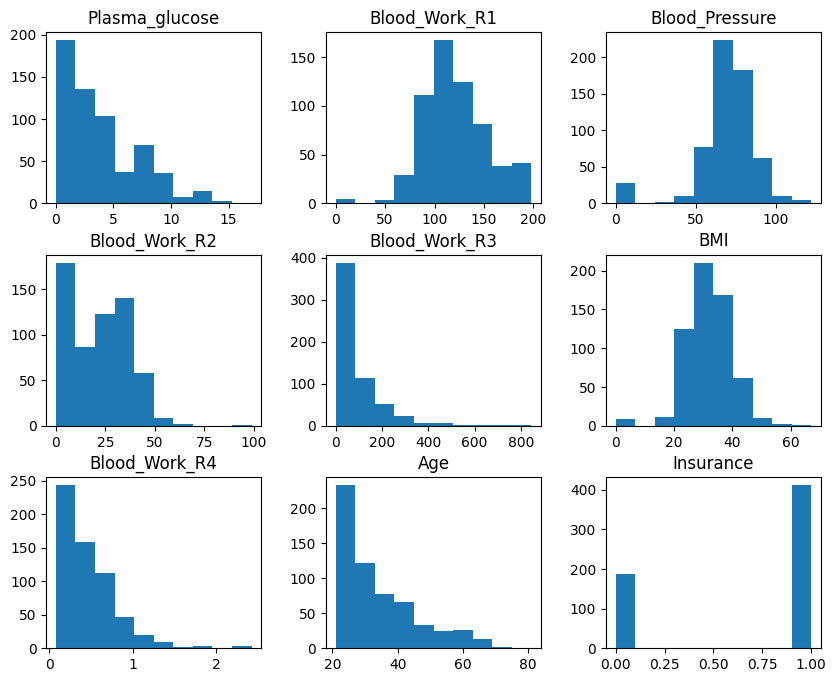

In [43]:
train_data.hist(figsize=(10, 8), grid=False)
plt.show()

CHECK FOR OUTLIERS

<Axes: >

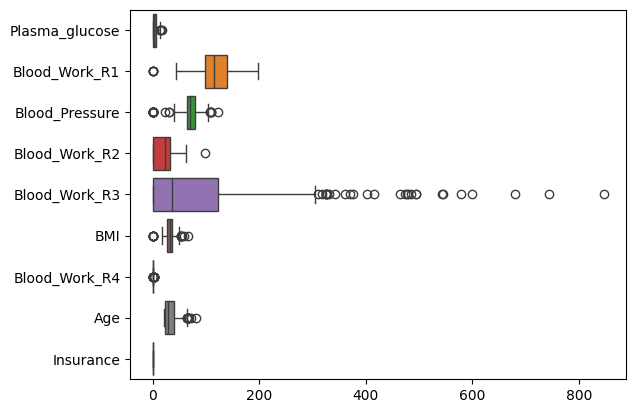

In [44]:
# Boxplot to see the outlier of each numerical column
sns.boxplot(data=train_data, orient="h")

The output strongly shows that there are outliers in the dataset.

FIND MISSING VALUES IN THE VARIOUS COLUMNS

In [45]:
def count_missing_val(df, cols):
    print('\tMissing val Count\tMissing val Percentage')
    for col in cols:
        missing_cnt = df[col].value_counts()[0] # frequency of zero entries in a particular column
        missing_percentage = round((missing_cnt/len(df) * 100), 2)
        print(str(col) + ': \t\t' + str(missing_cnt) + '\t\t\t' + str(missing_percentage).zfill(5) + '\t%')

        # finding the missing values in the respective columns in the train set
train_missing_col=['Plasma_glucose', 'Blood_Pressure', 'Blood_Work_R2', 'Blood_Work_R3', 'BMI']
count_missing_val(train_data, train_missing_col)

	Missing val Count	Missing val Percentage
Plasma_glucose: 		93			15.53	%
Blood_Pressure: 		28			04.67	%
Blood_Work_R2: 		175			29.22	%
Blood_Work_R3: 		289			48.25	%
BMI: 		9			001.5	%


DEALING WITH MISSING VALUES

In [46]:
# function to check for outliers in the dataframe
def handle_outliers(data_frame, column_name, method='clip', threshold=1.5):
    column = data_frame[column_name]
    q1 = column.quantile(0.25)
    q3 = column.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - threshold * iqr
    upper_bound = q3 + threshold * iqr

    if method == 'clip':
        updated_column = column.clip(lower_bound, upper_bound)
    elif method == 'remove':
        updated_column = column[(column >= lower_bound) & (column <= upper_bound)]
    else:
        raise ValueError("Invalid method. Choose 'clip' or 'remove'.")

    return updated_column

In [47]:
# handling outliers in the train dataset
train_data['Plasma_glucose'] = handle_outliers(train_data, 'Plasma_glucose', method='clip')
train_data['Blood_Work_R1']= handle_outliers(train_data, 'Blood_Work_R1', method='clip')
train_data['Blood_Pressure']= handle_outliers(train_data, 'Blood_Pressure', method='clip')
train_data['Blood_Work_R2']= handle_outliers(train_data, 'Blood_Work_R2', method='clip')
train_data['Blood_Work_R3']= handle_outliers(train_data, 'Blood_Work_R3', method='clip')
train_data['BMI']= handle_outliers(train_data, 'BMI', method='clip')
train_data['Age']= handle_outliers(train_data, 'Age', method='clip')
train_data['Insurance']= handle_outliers(train_data, 'Insurance', method='clip')


VISUALIZATION OF OUTLIERS IN THE DATASET

<Axes: >

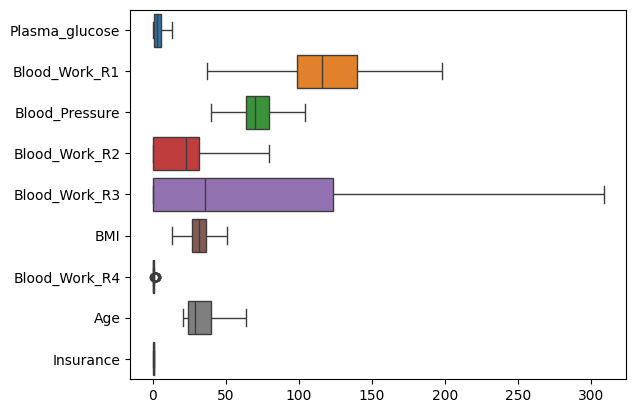

In [48]:
sns.boxplot(data=train_data, orient="h")

All outliers have been removed

In [49]:
#fig_1 = px.pie(train_data, names='Sepsis', title='Plot of Ratio of the Label Variables (Sepsis)')
#plot(fig_1)

DATA PREPARATION

In [50]:
#Split data into X and Y 
X = train_data.drop(['Sepsis','ID', ], axis=1)
Y = train_data['Sepsis']
X

,Plasma_glucose,Blood_Work_R1,Blood_Pressure,Blood_Work_R2,Blood_Work_R3,BMI,Blood_Work_R4,Age,Insurance
0,6.0,148.0,72,35,0.0,33.6,0.627,50,0
1,1.0,85.0,66,29,0.0,26.6,0.351,31,0
2,8.0,183.0,64,0,0.0,23.3,0.672,32,1
3,1.0,89.0,66,23,94.0,28.1,0.167,21,1
4,0.0,137.0,40,35,168.0,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
594,6.0,123.0,72,45,230.0,33.6,0.733,34,0
595,0.0,188.0,82,14,185.0,32.0,0.682,22,1
596,0.0,67.0,76,0,0.0,45.3,0.194,46,1
597,1.0,89.0,40,19,25.0,27.8,0.559,21,0


SPLIT DATA INTO TRAINING AND EVALUATION

In [51]:
X_train, X_test, Y_train, Y_test=train_test_split(X,Y, test_size= 0.2, random_state=47, stratify=Y)

LABEL ENCODING

In [52]:
LabelEncoder = LabelEncoder()
y_train_encoded = LabelEncoder.fit_transform(Y_train)
y_test_encoded = LabelEncoder.transform(Y_test)

In [53]:
# Define preprocessing steps for numerical and categorical features
numerical_features = X.select_dtypes(include='number').columns
categorical_features = X.select_dtypes(include='object').columns


In [54]:
# Create a pipeline for both numerical and categorical data

numerical_data= Pipeline(steps=[
    ('num_imputer',SimpleImputer(strategy='median')),
    ('scaler', RobustScaler()),
    
])


categorical_data= Pipeline(steps=[
    ('cat_imputer',SimpleImputer(strategy='most_frequent')),
    ('encoder',OneHotEncoder(handle_unknown='ignore')),
    
    
])

Preprocessor= ColumnTransformer([
    ('numerical',numerical_data,numerical_features ),
    ('categorical',categorical_data,categorical_features)

])

In [55]:
# decision tree pipeline
Xgboost= Pipeline([
    ('preprocessor',Preprocessor ),
    ('classifier', XGBClassifier(random_state=42))
])

# Random Forest Pipeline
random_forest = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])


# KNN model
knn_model = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', KNeighborsClassifier())
])


# Gradient Descent model (Gradient Boosting)
gradient_descent_model = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', GradientBoostingClassifier())
])


# SVC model 
SVC_model = Pipeline([
    ('preprocessor', Preprocessor),
    ('classifier', SVC(probability=True))
])

TRAIN ALL MODELS

In [56]:
Xgboost.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=42, ...))])

In [57]:
random_forest.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', RandomForestClassifier(random_state=42))])

In [58]:
knn_model.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', KNeighborsClassifier())])

In [59]:
gradient_descent_model.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', GradientBoostingClassifier())])

In [60]:
SVC_model.fit(X_train,y_train_encoded)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('numerical',
                                                  Pipeline(steps=[('num_imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  Index(['Plasma_glucose', 'Blood_Work_R1', 'Blood_Pressure', 'Blood_Work_R2',
       'Blood_Work_R3', 'BMI', 'Blood_Work_R4', 'Age', 'Insurance'],
      dtype='object')),
                                                 ('categorical',
                                                  Pipeline(steps=[('cat_imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('encoder',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  Index([], dtype='object'))])),
                ('classifier', SVC(probability=True))])

PREDICT AND CREATE A CLASSIFICATION REPORT FOR ALL MODELS

In [61]:
# Train and evaluate the models

models = {
    'Xgboost model': Xgboost,
    'Random Forest': random_forest,
    'KNN': knn_model,
    'Gradient Descent': gradient_descent_model,
    'SVC Model': SVC_model
}

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train_encoded)

    # Make predictions
    y_pred = model.predict(X_test)

    # Create a classification report
    report = classification_report(y_test_encoded, y_pred)
    print(f"Classification Report for {name}:\n{report}")
    print('='* 50)
 

Classification Report for Xgboost model:
              precision    recall  f1-score   support

           0       0.80      0.82      0.81        78
           1       0.65      0.62      0.63        42

    accuracy                           0.75       120
   macro avg       0.73      0.72      0.72       120
weighted avg       0.75      0.75      0.75       120

Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.83      0.88      0.86        78
           1       0.76      0.67      0.71        42

    accuracy                           0.81       120
   macro avg       0.79      0.78      0.78       120
weighted avg       0.81      0.81      0.81       120

Classification Report for KNN:
              precision    recall  f1-score   support

           0       0.76      0.86      0.81        78
           1       0.66      0.50      0.57        42

    accuracy                           0.73       120
   macro avg   

MODEL EVALUATION 

VISUALIZE CONFUSTION MATRIX

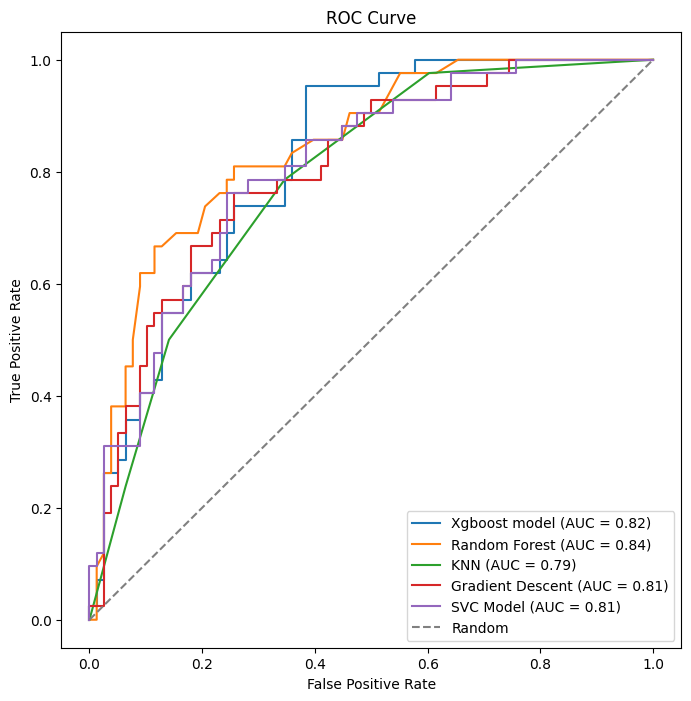

In [63]:
models = {
    
    'Xgboost model': Xgboost,
    'Random Forest': random_forest,
    'KNN': knn_model,
    'Gradient Descent': gradient_descent_model,
    'SVC Model': SVC_model
}

plt.figure(figsize=(8, 8))

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train_encoded)

    # Get predicted probabilities for the positive class
    y_pred_prob = model.predict_proba(X_test)[:, 1]

    # Compute ROC curve and AUC
    fpr, tpr, _ = roc_curve(y_test_encoded, y_pred_prob)
    roc_auc = auc(fpr, tpr)

    # Plot ROC curve
    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f})')

# Plot the diagonal line for reference
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')

# Set labels and title
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')

# Show the plot
plt.show()

SAVE MODELS ON JOBLIP

In [71]:

# Save XGBoost model
joblib.dump(models['Xgboost model'], 'Xgboost_model.joblib')

# Save Random Forest model
joblib.dump(models['Random Forest'], 'RandomForest_model.joblib')

['RandomForest_model.joblib']